# CIS600 - Social Media & Data Mining
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

# NLP Again

###  March 20, 2018

### Using built-in (included in `nltk`) corpora, we can build classifiers that will automatically tag new documents with appropriate *category labels* (in this case, *pos* or *neg*).

### First we construct a list of documents, labelled with their categories.

### For this example, we've chosen the Movie Reviews corpus, which categorizes each review as positive or negative.

In [6]:
# We'll need numpy, as usual
import numpy as np

# Importing some data
from nltk.corpus import movie_reviews

# Getting review ids with pos/neg for each
documents = [(list(movie_reviews.words(fileid)), category)
                for category in movie_reviews.categories()
                    for fileid in movie_reviews.fileids(category)]

# Mixing up the order
np.random.shuffle(documents)

In [ ]:
help(np.random.shuffle)

### Next, we define a feature extractor for documents so that the classifier will know which aspects of the data to pay attention to.

In [12]:
import nltk

# All words, by frequency
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

# Most frequent 2000 words/tokens
word_features = [w for (w,c) in all_words.most_common(2000)]

# Extracting features from a given document
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


In [ ]:
help(nltk.FreqDist)

In [ ]:
help(all_words.most_common)

In [ ]:
help(all_words.keys)

### Let's take a brief detour to look at what `nltk` is doing for us here.

[('the', 32), ('.', 31), ('of', 30), (',', 29), ('to', 26), ('said', 16), ('a', 14), ('trade', 13), ('U.S.', 13), ('in', 13), ('Japan', 12), ("'s", 12), ('and', 12), ('for', 7), ('``', 7), ("''", 7), ('on', 6), ('dlrs', 6), ('imports', 5), ('be', 5), ('The', 5), ('it', 5), ('tariffs', 5), ('billion', 5), ('exports', 5), ('are', 5), ('is', 5), ('between', 4), ('And', 4), ('that', 4), ('businessmen', 4), ('might', 4), ('would', 4), ('Japanese', 4), ('electronics', 4), ('Taiwan', 4), ('also', 4), ('U.S', 4), ('year', 4), ('Hong', 4), ('Kong', 4), ('against', 3), ('their', 3), ('short-term', 3), ('will', 3), ('semiconductors', 3), ('at', 3), ('We', 3), ('&', 3), ('lt', 3), (';', 3), ('>', 3), ('In', 3), ('surplus', 3), ('with', 3), ('South', 3), ('Korea', 3), ('Industry', 3), ('has', 2), ('among', 2), ('economic', 2), ('officials', 2), ('They', 2), ('boost', 2), ('lead', 2), ('curbs', 2), ('products', 2), ('But', 2), ('some', 2), ('exporters', 2), ('Tokyo', 2), ('goods', 2), ('alleged', 2)

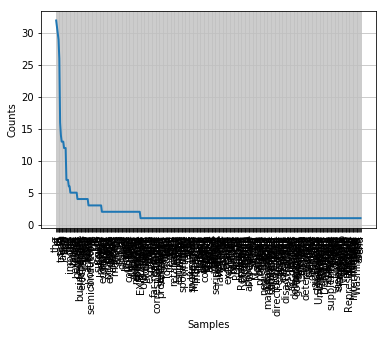

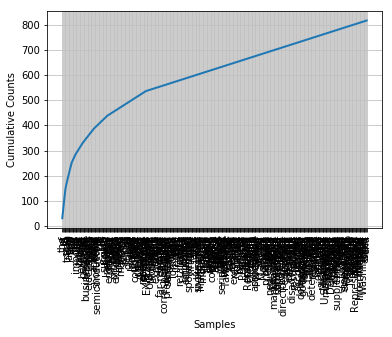

In [17]:
# Get all tokens
tokens = nltk.tokenize.word_tokenize(nltk.corpus.reuters.raw('test/14826'))

# Compute a frequency distribution
fdist = nltk.FreqDist(tokens)

# Print top 100 tokens by frequency
print(fdist.most_common(100))

# Print total and total unique

print("Total number of tokens = {}".format(fdist.N()))

print("Total number of unique tokens = {}".format(len(fdist.keys())))

# Iterate over samples

for token in fdist:
    print("Term " + token + " occurs " + str(fdist[token]) + " time(s).")

# Take a look at it
fdist.plot()

# And the CDF
fdist.plot(cumulative=True)


### Back to the classifier at hand.

In [ ]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt')))

### Now that we've defined our feature extractor, we can use it to train a classifier to label new movie reviews.

In [25]:
# Extract the features
featuresets = [(document_features(d),c) for (d,c) in documents]

# Split the dataset
train_set, test_set = featuresets[100:], featuresets[:100]

# Train the classifier
clf = nltk.NaiveBayesClassifier.train(train_set)

### Finally, let's use it.

In [33]:
clf.classify(featuresets[4][0])

'pos'

### What should we expect in examining this first "featureset"?

In [ ]:
featuresets[4]

### That's not readable, which document does it come from? Let's look at that.

In [ ]:
' '.join(documents[4][0])

### What else does our model offer? We can look at the most informative features, for example.

In [ ]:
clf.show_most_informative_features(5)

### That's pretty devastating!

### Now let's look at an example of SA on some fake Twitter data.

In [48]:
# Training data
pos_tweets = [('I love this car','positive'),
             ('This view is amazing','positive'),
             ('I feel great this morning','positive'),
             ('I am so excited about the concert','positive'),
             ('He is my best friend','positive')]

neg_tweets = [('I do not like this car','negative'),
             ('This view is horrible','negative'),
             ('I feel tired this morning','negative'),
             ('I am not looking forward to the concert','negative'),
             ('He is my enemy','negative')]

### We take both the lists and create a single list of tuples.
- The first element is an array of words and the second a sentiment
- We lowercase everything (here I have verbed "lowercase" (and verbed "verb" (...))) and discard words smaller than three characters

In [49]:
# Create an empty list
twts = []

# Build it in a loop
for (words,sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    twts.append((words_filtered,sentiment))

In [50]:
twts

[(['love', 'this', 'car'], 'positive'),
 (['this', 'view', 'amazing'], 'positive'),
 (['feel', 'great', 'this', 'morning'], 'positive'),
 (['excited', 'about', 'the', 'concert'], 'positive'),
 (['best', 'friend'], 'positive'),
 (['not', 'like', 'this', 'car'], 'negative'),
 (['this', 'view', 'horrible'], 'negative'),
 (['feel', 'tired', 'this', 'morning'], 'negative'),
 (['not', 'looking', 'forward', 'the', 'concert'], 'negative'),
 (['enemy'], 'negative')]

### Next, the list of *word features* needs to be extracted from the tweets. Here are two helper functions to do pretty much the same thing we did in the previous example.

In [47]:
# Get all the words from all the tweets
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

# Extract the most frequent words
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = [w for (w, c) in wordlist.most_common(2000)]
    return word_features

word_features = get_word_features(get_words_in_tweets(twts))

In [ ]:
word_features

### This is starting to look like something we can use, but if you are following along then you've noticed that we still just have words. We need features we can train on. So we *record whether or not each of these words is present in a given tweet*. That *boolean* value is then a feature we can compute with.

In [56]:
def extract_features(document): # I renamed it; that's all
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

### Applying it...

In [59]:
training_set = [(extract_features(d), c) for (d,c) in twts]

### Alternatively, `nltk` gives you a higher-order way to do this:

In [61]:
training_set = nltk.classify.apply_features(extract_features, twts)

In [ ]:
training_set

### Now let's training and look at some results.

In [ ]:
# Training
clf2 = nltk.NaiveBayesClassifier.train(training_set)

# Important features
clf2.show_most_informative_features(100)

### How about a test?

In [66]:
test_twts = ['I feel happy this morning',
            'Larry is my friend',
            'I do not like that man',
            'My house is not great',
            'Your song is annoying']

In [ ]:
for t in test_twts:
    print("{0} : {1}".format(t, clf2.classify(extract_features(t.split()))))

### Hey man, your song is annoying!

### But what is wrong with these 'tweets'? They were too easy to process. Take a look at a real sample, already labelled for you, and recall our initial discussion of tokenization.

### The `nltk` package includes twitter data (perhaps not by default).

In [22]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
from nltk.corpus import twitter_samples

strings = twitter_samples.strings('positive_tweets.json')

### Before we do more tweet examples, here is an interesting example from the NLTK book. It addresses a question that came up in office hours and you might want to use it for establishing 'ground truth' for training of another model. From the documentation:

>In [4](http://www.nltk.org/book/ch02.html#sec-lexical-resources) we saw that male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male. Let's build a classifier to model these differences more precisely.

### So we are going to classify names as *male* or *female*, guided in our feature extraction by this observation.

In [68]:
# Just plucking off that last letter...
def gender_features(word):
    return {'last_letter': word[-1]}

# Trying it out
gender_features('Shrek')

{'last_letter': 'k'}

### Let's now get some data...

In [70]:
from nltk.corpus import names

# Observations with labels
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                    [(name, 'female') for name in names.words('female.txt')])
# No output, remember this works *in place*
np.random.shuffle(labeled_names)

### Feature extraction, then training-test split...

In [71]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
clf3 = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
clf3.classify(gender_features('Neo'))

In [ ]:
clf3.classify(gender_features('Trinity'))

### Not bad!

In [ ]:
clf3.show_most_informative_features(5)

### How about my name...

In [ ]:
clf3.classify(gender_features('Martin'))

### How about others in the department...

In [ ]:
print(
clf3.classify(gender_features('Jae')),
clf3.classify(gender_features('Paakwesi')),
clf3.classify(gender_features('Chunxu')))